# Reconnaître des visages avec SVM

SVM est un algorithme assez puissant pour faire de la classification. Bien qu'on puisse l'utiliser sur des datasets classiques, tentons de regarder comment on pourrait faire de la reconnaissance de visages connus avec l'algorithme. 

0. Importez les librairies usuelles 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Dans ```sklearn.datasets``` importez ```fetch_lfw_people```

Mettez ces données dans un DataFrame 

In [0]:
from sklearn.datasets import fetch_lfw_people
 
faces = fetch_lfw_people(min_faces_per_person=60)

In [4]:
faces

{'DESCR': ".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones

In [5]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [6]:
faces.target

array([1, 3, 3, ..., 7, 3, 5])

In [7]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

2. Regardez la variables ```target_names```

In [8]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


3. Regardez la ```shape``` des images 

In [9]:
print(faces.images.shape)

(1348, 62, 47)


In [10]:
faces.images

array([[[138.        , 135.66667   , 127.666664  , ...,  69.        ,
          68.333336  ,  67.333336  ],
        [146.        , 139.33333   , 125.        , ...,  68.333336  ,
          67.666664  ,  67.333336  ],
        [150.        , 138.33333   , 124.333336  , ...,  68.333336  ,
          67.666664  ,  66.666664  ],
        ...,
        [153.        , 174.        , 110.666664  , ...,   1.6666666 ,
           0.6666667 ,   0.6666667 ],
        [122.        , 193.        , 167.33333   , ...,   1.3333334 ,
           1.6666666 ,   1.3333334 ],
        [ 88.        , 177.33333   , 206.        , ...,   1.6666666 ,
           1.6666666 ,   0.33333334]],

       [[ 71.333336  ,  56.        ,  67.666664  , ...,  74.333336  ,
          89.666664  ,  78.666664  ],
        [ 64.333336  ,  61.666668  ,  84.333336  , ...,  72.        ,
          87.        ,  78.666664  ],
        [ 74.        ,  76.        ,  94.333336  , ...,  69.666664  ,
          84.666664  ,  83.333336  ],
        ...,


In [11]:
62*47

2914

---> Nous obtenons une np.array en trois dimension. La première dimension représente le  nombre d'images, la deuxième dimension le nombre de pixels en ligne des images, soit la **hauteur de l'image**, et la dernière le nombre de pixels en colonne des images soit la **largeur de l'image**. 



4. Dans matplotlib, vous avez une méthode qui s'appelle ```imshow()``` qui vous permet de voir une image. Essayez d'utiliser cette méthode pour visualiser une image de votre dataset 

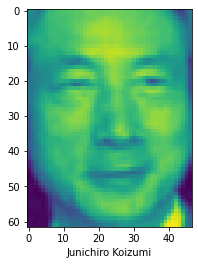

In [12]:
plt.imshow(faces.images[100])
plt.xlabel(faces.target_names[faces.target[100]]);


5. Tentez maintenant de regarder les 15 premières images en utilisant une boucle

Pour cela, regardez la documentation de :

1. [enumerate()](http://book.pythontips.com/en/latest/enumerate.html)
2. [plt.subplots()](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)
3. [ax.flat](https://stackoverflow.com/questions/46862861/what-does-axes-flat-in-matplotlib-do)


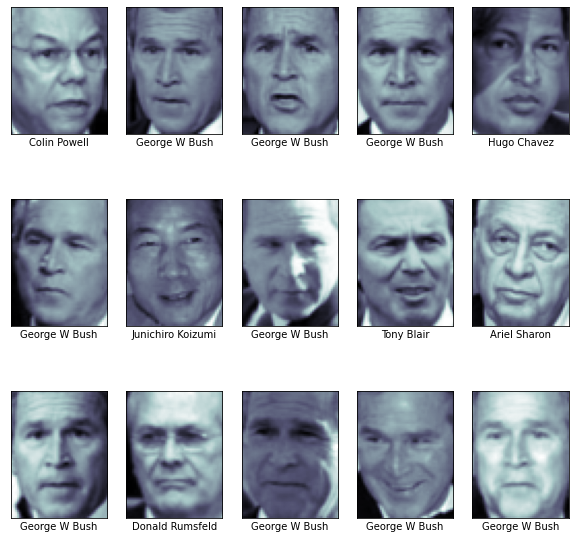

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

5. Importez Support Vector Machine de Sklearn et instanciez votre modèle 

In [0]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')

In [45]:
faces.data

array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
          1.6666666 ,   0.33333334],
       [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
        243.        , 238.33333   ],
       [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
        194.33333   , 241.        ],
       ...,
       [ 29.333334  ,  29.        ,  29.333334  , ..., 145.        ,
        147.        , 141.66667   ],
       [ 49.333332  ,  55.666668  ,  76.666664  , ..., 186.33333   ,
        176.33333   , 161.        ],
       [ 31.        ,  26.333334  ,  28.        , ...,  34.        ,
         42.        ,  69.666664  ]], dtype=float32)

In [15]:
faces.images[0]

array([[138.        , 135.66667   , 127.666664  , ...,  69.        ,
         68.333336  ,  67.333336  ],
       [146.        , 139.33333   , 125.        , ...,  68.333336  ,
         67.666664  ,  67.333336  ],
       [150.        , 138.33333   , 124.333336  , ...,  68.333336  ,
         67.666664  ,  66.666664  ],
       ...,
       [153.        , 174.        , 110.666664  , ...,   1.6666666 ,
          0.6666667 ,   0.6666667 ],
       [122.        , 193.        , 167.33333   , ...,   1.3333334 ,
          1.6666666 ,   1.3333334 ],
       [ 88.        , 177.33333   , 206.        , ...,   1.6666666 ,
          1.6666666 ,   0.33333334]], dtype=float32)

6. Splittez vos données en train et en test 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
                                                    faces.target,
                                                    test_size = 0.3,
                                                    random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

7. Fittez votre données de train et regardez votre score

In [17]:
%time svm.fit(X_train, y_train)

CPU times: user 5.5 s, sys: 11.9 ms, total: 5.51 s
Wall time: 5.51 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
%time svm.score(X_test, y_test)

CPU times: user 1.51 s, sys: 1.87 ms, total: 1.51 s
Wall time: 1.52 s


0.762962962962963

In [0]:
SVC?

8. Tentons d'améliorer le score. Faites une GridSearch pour voir quel modèle serait optimum 

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svm, param_grid, verbose=2, n_jobs=-1)
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [20]:
%time grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.7min finished


CPU times: user 4.13 s, sys: 36 ms, total: 4.16 s
Wall time: 3min 44s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [21]:
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001}


In [22]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.8222222222222222

9. Notre score s'améliore mais, on peut encore faire mieux. Nous allons commencer quelque chose que nous allons voir plus en détail dans les prochains cours : PCA 

Le principe de PCA est de combiner les variables dans un modèle pour garder uniquement les éléments les plus explicatifs. 

Dans sklearn import PCA via le code suivant : 

```
from sklearn.decomposition import PCA
```

Vous instancierez cette classe de la façon suivante : 

```
pca = PCA(n_components=0.99, whiten=True, random_state=42)
```

In [0]:
from sklearn.decomposition import PCA
PCA?
pca =PCA(n_components=0.99, random_state=42)

10. Faites un ```fit_transform``` sur vos données ```X_train``` & ```X_test```

In [24]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(943, 371)

---> Ici, nous avons pris uniquement 0.99 

In [0]:
#print(pca.components_.shape)
#print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

In [58]:
pca.components_[0].shape

(2914,)

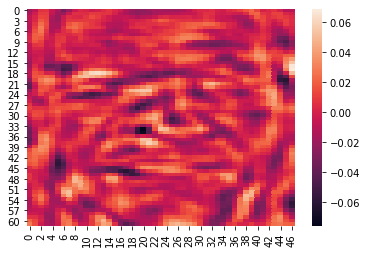

In [59]:
pc1 = pca.components_[149].reshape(62,47)
import seaborn as sns
sns.heatmap(pc1)

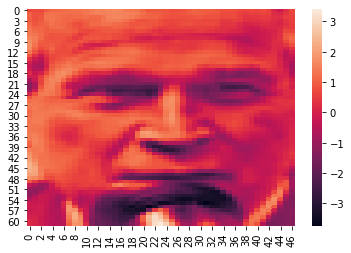

In [60]:
sns.heatmap(X_train[0].reshape(62,47))

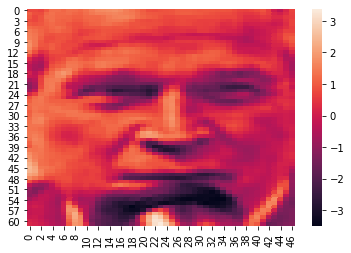

In [61]:
sns.heatmap((np.dot(X_train_pca[0], pca.components_)).reshape(62,47))

10. Refaites une GridSarch avec les nouvelles données 

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel':['linear'],
    'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svm, param_grid, verbose=1)

In [63]:
grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   25.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

11. Regardez votre score à nouveau 

In [64]:
grid.best_estimator_.score(X_test_pca, y_test)

0.8

In [65]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}

12. Créez une variable ```y_pred``` qui contiendra les predictions pour ```X_test_pca```

In [0]:
y_pred = grid.best_estimator_.predict(X_test_pca)

13. Regardez vos résultats sur une matrice de confusion 

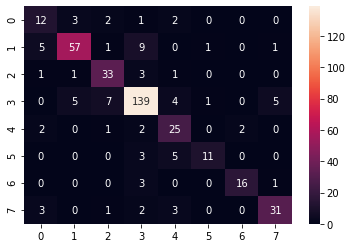

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

14. Tentons de regarder quelques images avec les prédictions que nous avons faites. De la même manière que nous l'avions fait au début de l'exercice, visualisez des images avec leurs prédictions. 

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

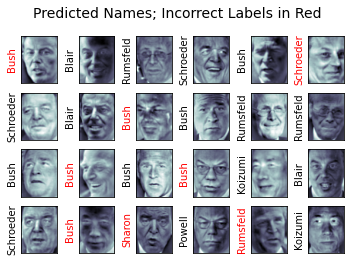

In [68]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [0]:
from sklearn.pipeline import Pipeline
pca = PCA()
svm = SVC()

pipe = Pipeline([('pca',pca),('svm',svm)])

params = {'pca__n_components' : [0.8, 0.9, 0.95, 0.99],
         'svm__C' : [0.1, 0.5, 1, 2, 5],
         'svm__gamma' : [0.001, 0.01, 0.1],
          }

grid = GridSearchCV(pipe, param_grid=params)
grid.fit(X_train, y_train)

In [0]:
grid.best_params_